In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Win8\Desktop\application_train.csv")

In [110]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.0,1,1,0,0,0,0,0,0,School


In [3]:
def fun(x):
    if x in ["Business Entity Type 3","XNA","Self-employed","Other","Medicine","Government","Business Entity Type 2","School","Trade: type 7","Kindergarten" ]:
        return(x)
    else:
        return "Unknown"
df["ORGANIZATION_TYPE"]=df["ORGANIZATION_TYPE"].apply(fun)

In [4]:
def fn(x):
    if x in ["Working","XNA","Commercial associate","Pensioner","State servant"]:
        return(x)
    else:
        return "Unknown"
df["NAME_INCOME_TYPE"]=df["NAME_INCOME_TYPE"].apply(fn)

In [5]:
def fn(x):
    if x in ["Secondary / secondary special","Higher education","Incomplete higher","Lower secondary"]:
        return(x)
    else:
        return "Unknown"
df["NAME_EDUCATION_TYPE"]=df["NAME_EDUCATION_TYPE"].apply(fn)

In [6]:
def fn_1(x):
    if x in ["House / apartment","Single / not married","With parents","Municipal apartment","Rented apartment"]:
        return(x)
    else:
        return "Unknown"
df["NAME_HOUSING_TYPE"]=df["NAME_HOUSING_TYPE"].apply(fn_1)

In [8]:
x=["Business Entity Type 3",  "XNA","Self-employed","Other","Medicine","Government","Business Entity Type 2","School","Trade: type 7","Kindergarten","Unknown"][::-1]
y=["Working","XNA","Commercial associate","Pensioner","State servant","Unknown"][::-1]
z=["Secondary / secondary special","Higher education","Incomplete higher","Lower secondary","Unknown"][::-1]
a=["House / apartment","Single / not married","With parents","Municipal apartment","Rented apartment","Unknown"][::-1]
b=["Married","Single / not married","Civil marriage","Separated","Widow","Unknown"][::-1]

# Ordinal Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder
df_cat=pd.DataFrame()
OrEn=OrdinalEncoder(categories=[x])
df_cat[["ORGANIZATION_TYPE"]]=OrEn.fit_transform(df[["ORGANIZATION_TYPE"]])

In [17]:
OrEn=OrdinalEncoder(categories=[y])
df_cat[["NAME_INCOME_TYPE"]]=OrEn.fit_transform(df[["NAME_INCOME_TYPE"]])

In [18]:
OrEn=OrdinalEncoder(categories=[z])
df_cat[["NAME_EDUCATION_TYPE"]]=OrEn.fit_transform(df[["NAME_EDUCATION_TYPE"]])

In [19]:
OrEn=OrdinalEncoder(categories=[a])
df_cat[["NAME_HOUSING_TYPE"]]=OrEn.fit_transform(df[["NAME_HOUSING_TYPE"]])

In [20]:
OrEn=OrdinalEncoder(categories=[b])
df_cat[["NAME_FAMILY_STATUS"]]=OrEn.fit_transform(df[["NAME_FAMILY_STATUS"]])

In [21]:
df_cat

,ORGANIZATION_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS
0,10.0,5.0,4.0,5.0,4.0
1,3.0,1.0,3.0,5.0,5.0
2,5.0,5.0,4.0,5.0,4.0
3,10.0,5.0,4.0,5.0,3.0
4,0.0,5.0,4.0,5.0,4.0
...,...,...,...,...,...
307506,0.0,5.0,4.0,3.0,2.0
307507,9.0,2.0,4.0,5.0,1.0
307508,3.0,5.0,3.0,5.0,2.0
307509,0.0,3.0,4.0,5.0,5.0


In [4]:
df["NAME_CONTRACT_TYPE"].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [21]:
df["FLAG_OWN_CAR"].unique()

array(['N', 'Y'], dtype=object)

### Info,Shape,Describe,Correlation,Duplicate values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [5]:
df.shape

(307511, 38)

In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.056720,2.152665,2.052463,2.031521,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.231307,0.910682,0.509034,0.502737,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,20.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000281,-0.002895,-0.001075,-0.001138,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.001758,0.009308,0.058899,0.060893,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.022619,0.879161,0.025423,0.024781,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.038378,0.016342,-0.085465,-0.091735,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.016632,0.063160,-0.101776,-0.110915,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,0.071709,0.075539,-0.128525,-0.141682,0.041299,0.079420,0.074550,-0.006214,0.000896,0.010084
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.017048,0.061185,-0.103786,-0.112208,0.026111,0.053171,0.052864,-0.027212,-0.020333,-0.001309
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.040012,-0.024209,-0.532877,-0.531535,0.002118,0.056944,0.081016,-0.050499,-0.044057,-0.015188
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.088208,0.278894,0.009361,0.008073,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.062112,-0.233549,0.032750,0.034624,-0.035803,-0.107150,-0.095539,-0.090516,-0.254559,-0.218101


In [55]:
df.duplicated().sum()

0

In [56]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [11]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

## Visualization

#### Univariate Analysis
##### KDE Plot

In [12]:
def KDE(x):
    for i in x:
        plt.figure(figsize=(5,5))
        sns.kdeplot(df[i])
        

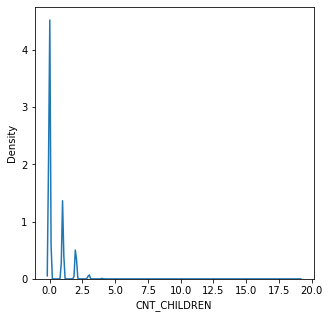

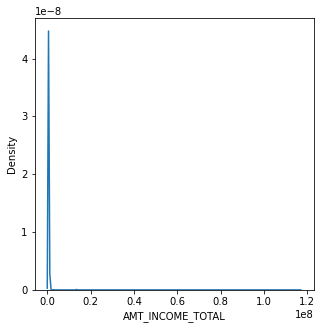

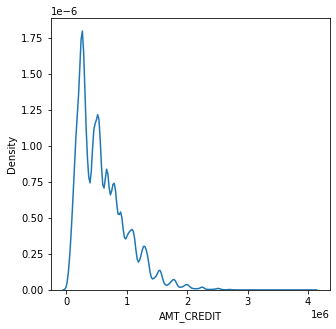

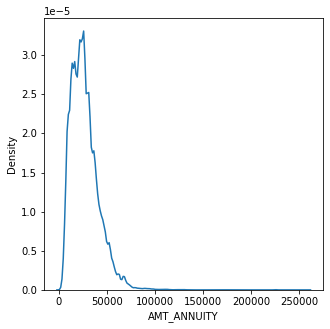

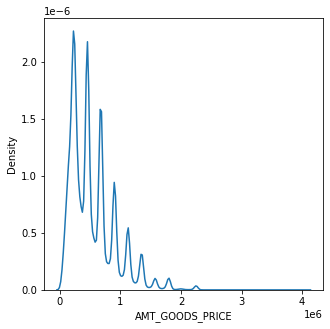

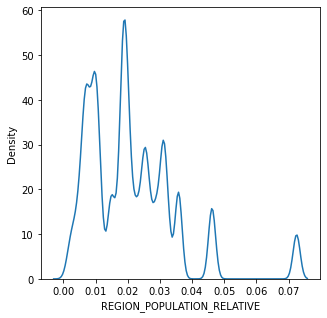

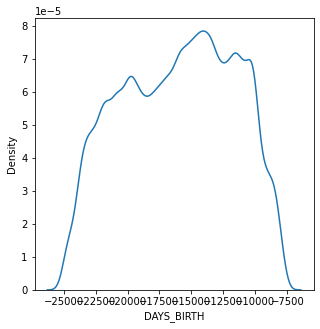

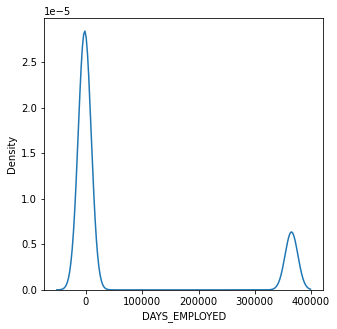

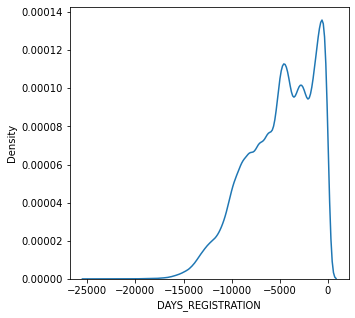

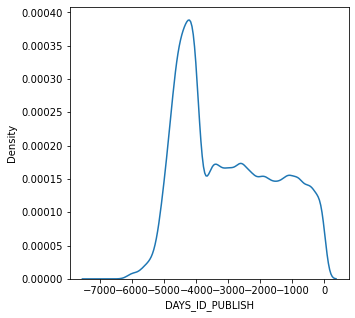

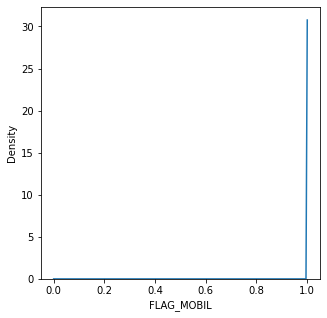

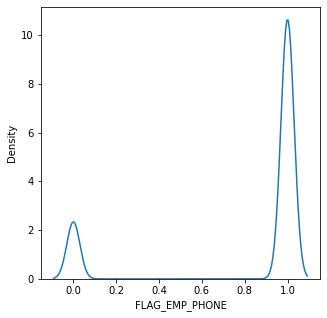

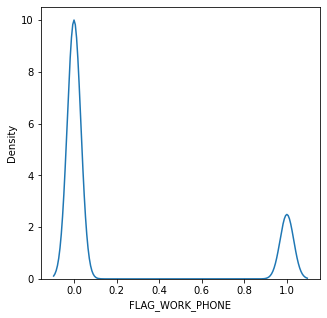

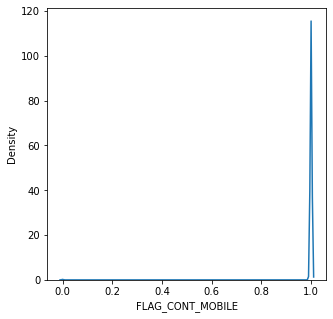

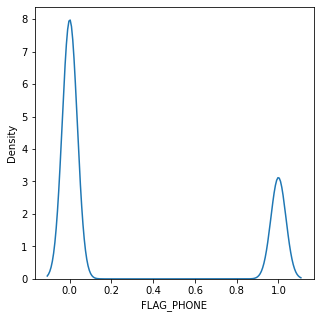

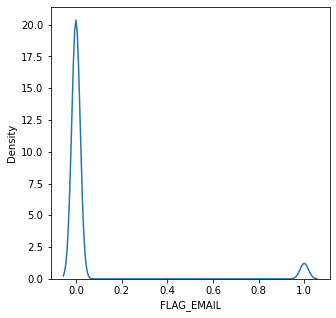

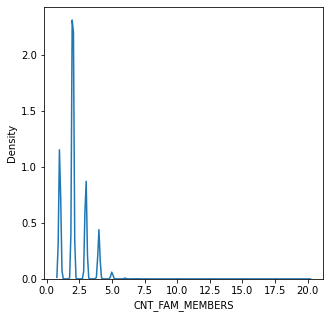

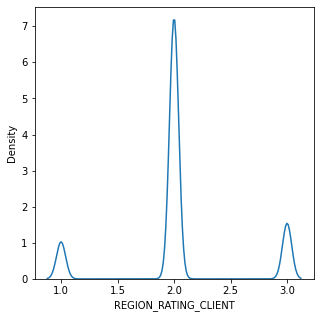

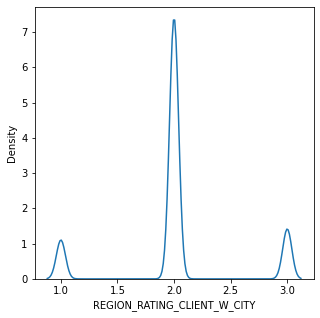

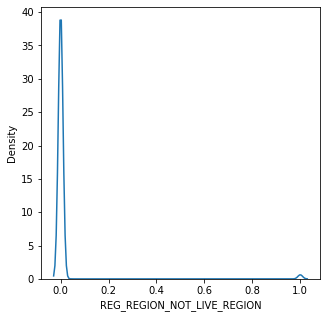

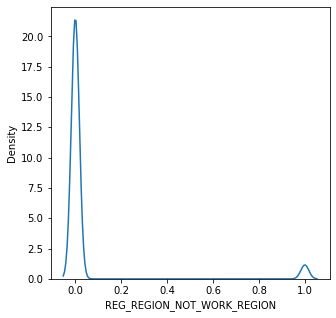

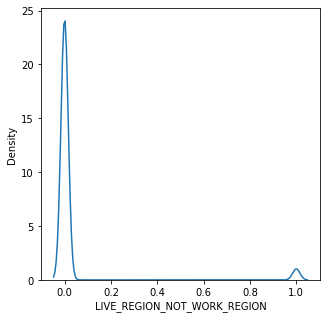

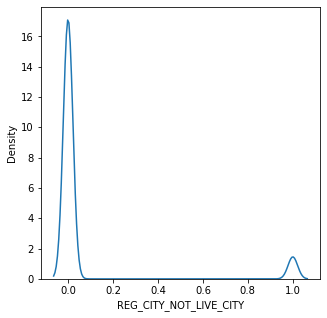

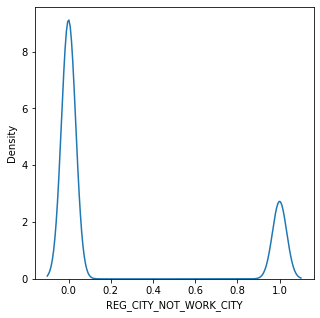

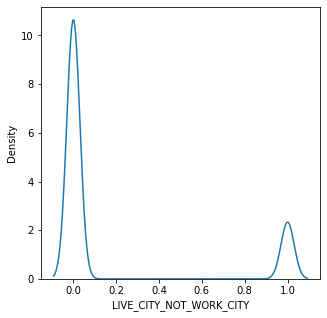

In [13]:
x=[ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
KDE(x)

##### BAR Polt

In [31]:
def bar(x):
    for i in x:
        plt.figure(figsize=(5,5))
        sns.barplot(df[i],df["TARGET"])

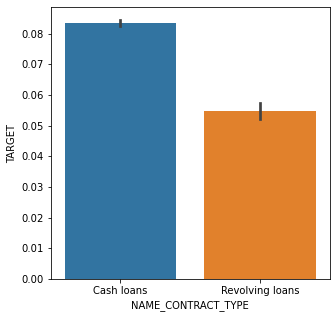

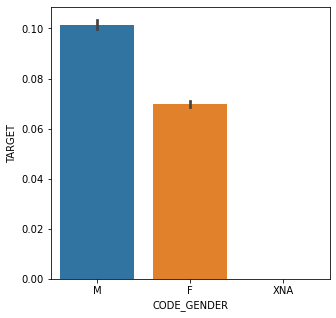

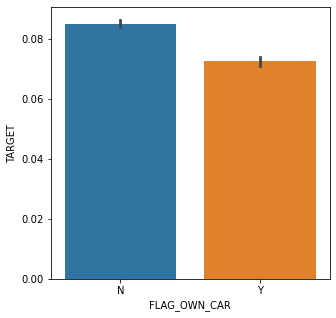

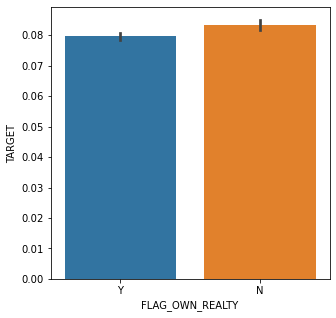

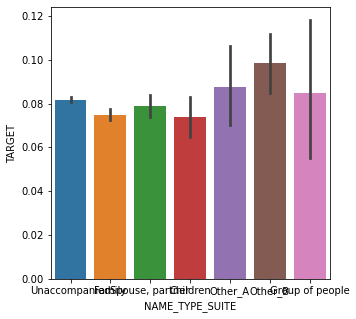

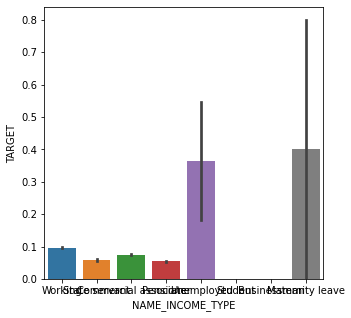

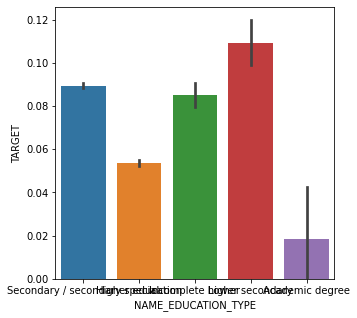

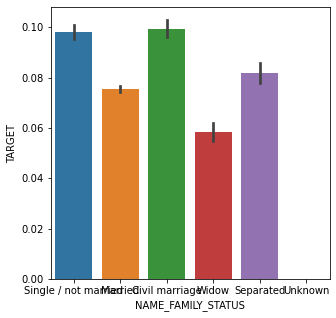

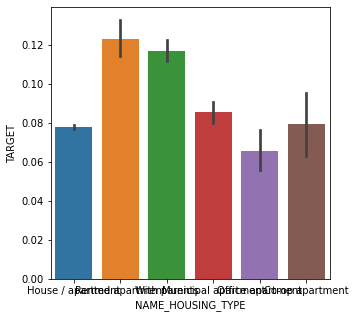

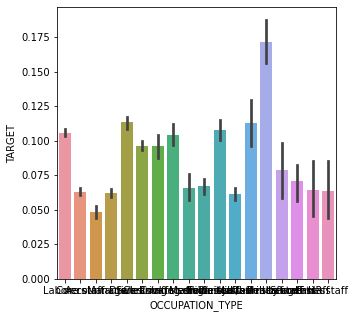

In [32]:
x=[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE' ,'OCCUPATION_TYPE']
bar(x)

##### Scatter Plot

In [ ]:
def scatter(x):
    y=1
    for i in x:
        if(y<len(x)):
            plt.figure(figsize=(5,5))
            sns.scatterplot(df[i],df[x[y]])
            y+=1

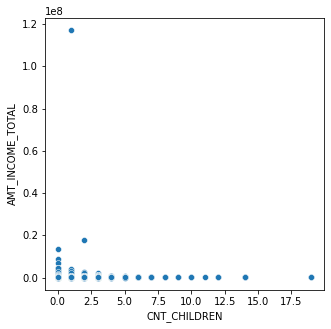

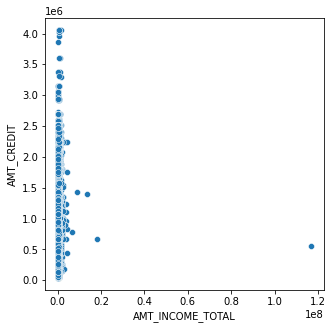

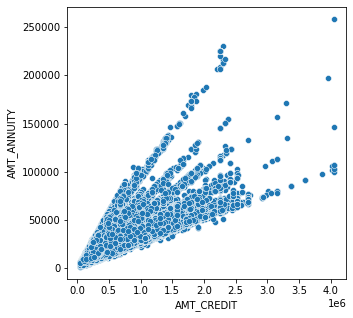

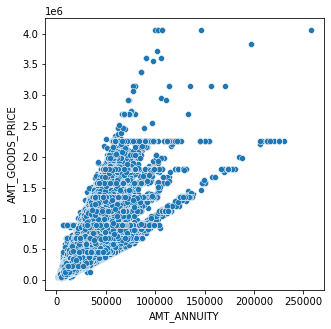

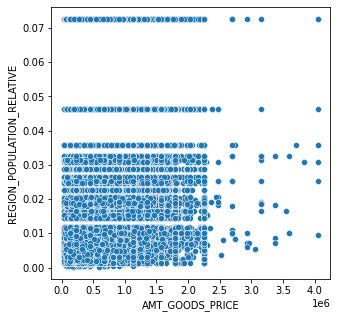

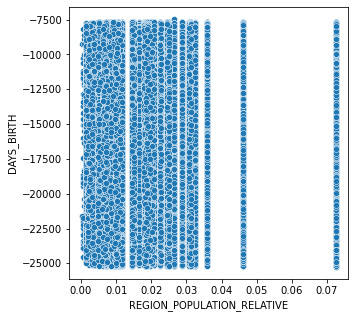

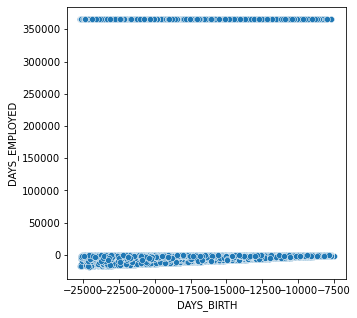

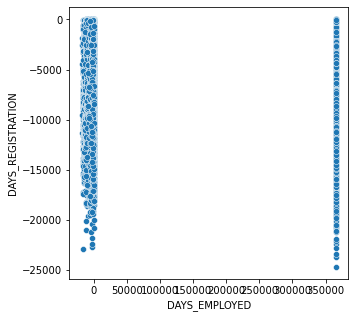

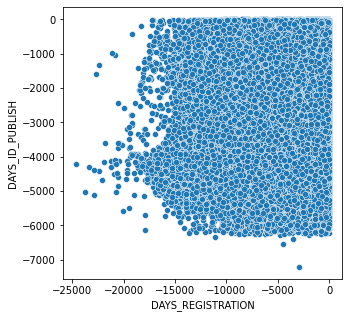

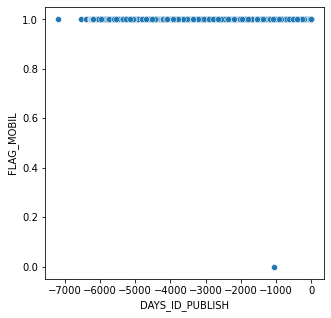

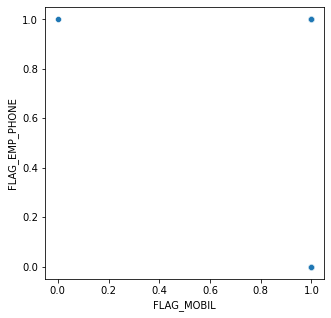

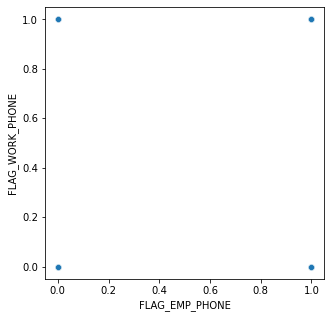

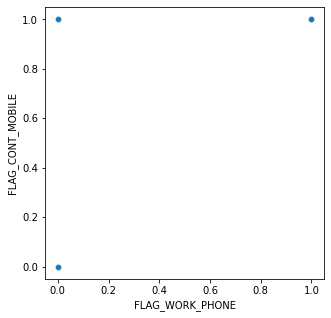

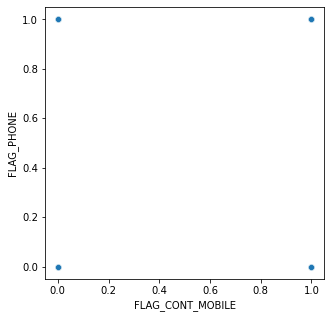

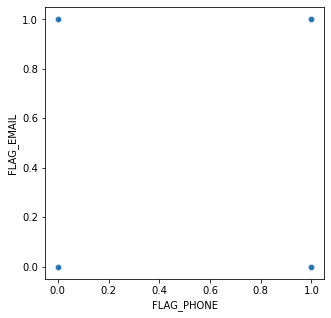

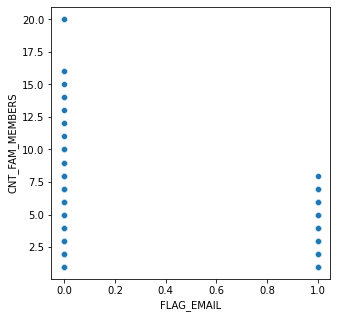

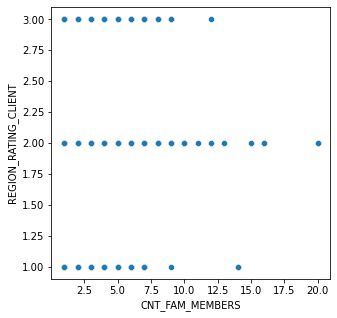

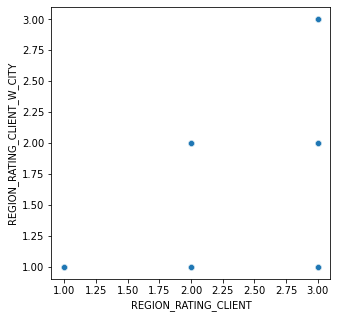

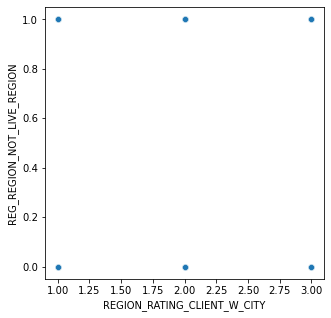

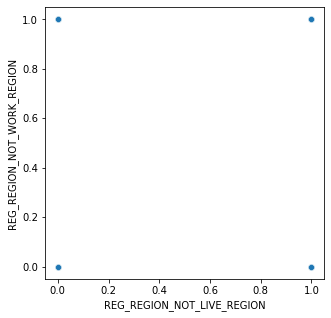

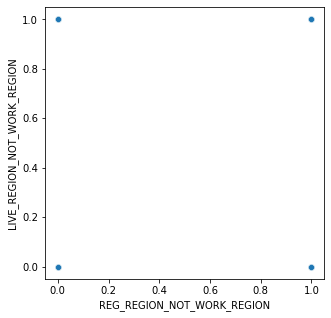

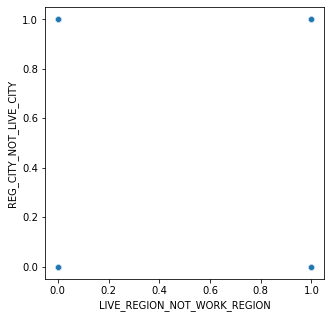

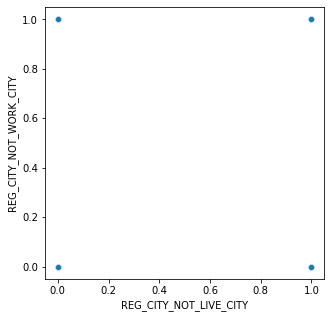

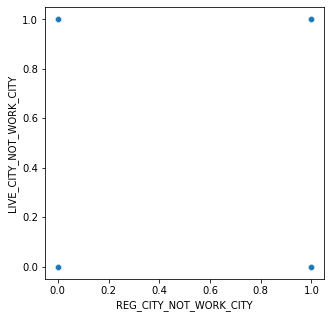

In [53]:
x=[ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
scatter(x)

<AxesSubplot:>

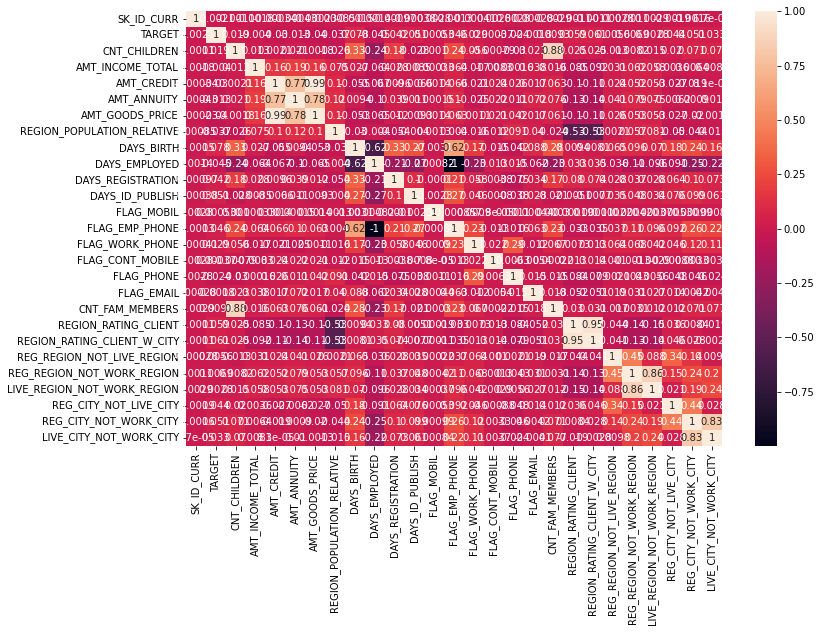

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [4]:
from scipy.stats import stats
import pylab

In [85]:
def plot_data(x):
    for i in x:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        df[i].hist()
        plt.subplot(1,2,2)
        stat.probplot(df[i],dist='norm',plot=pylab)
        plt.show()

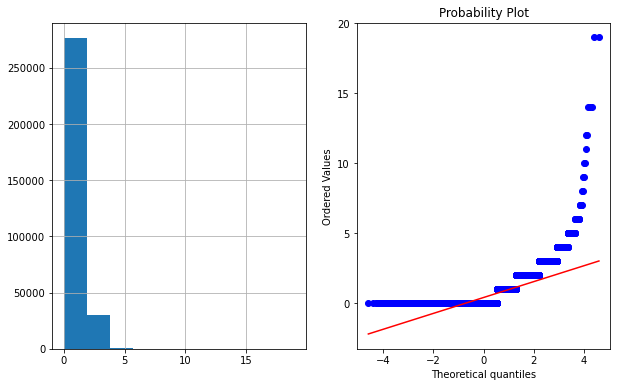

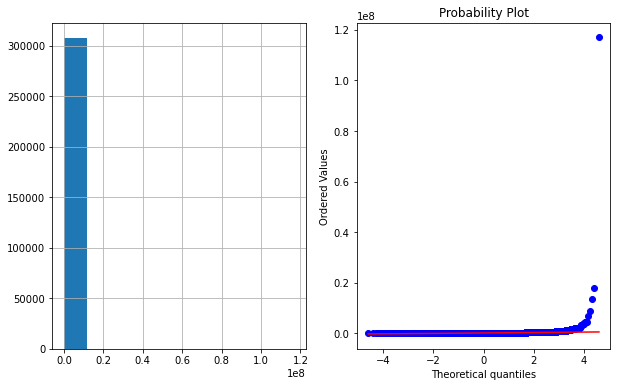

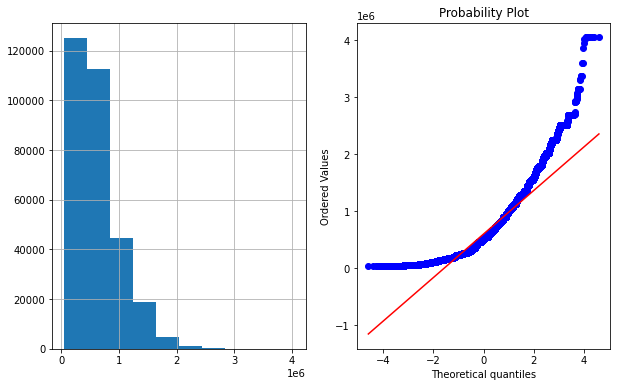

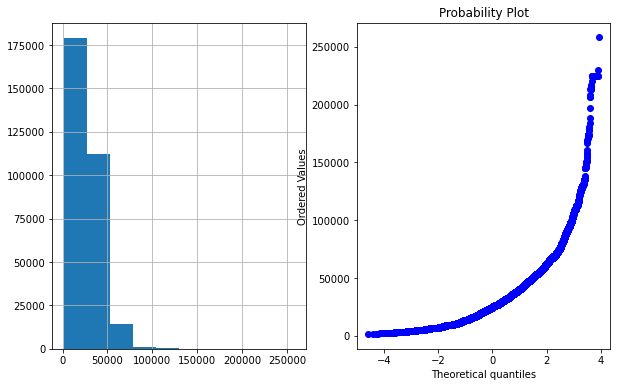

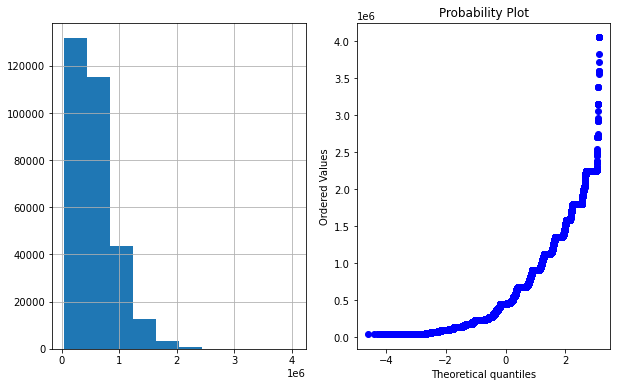

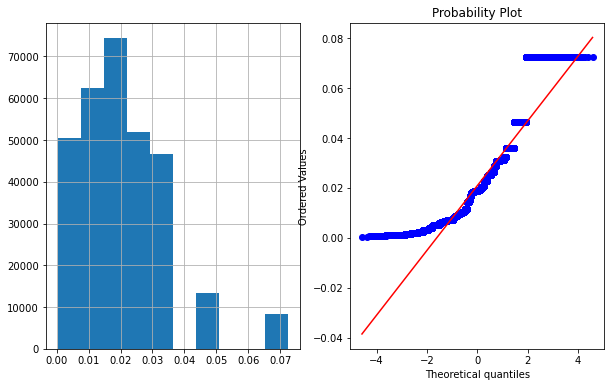

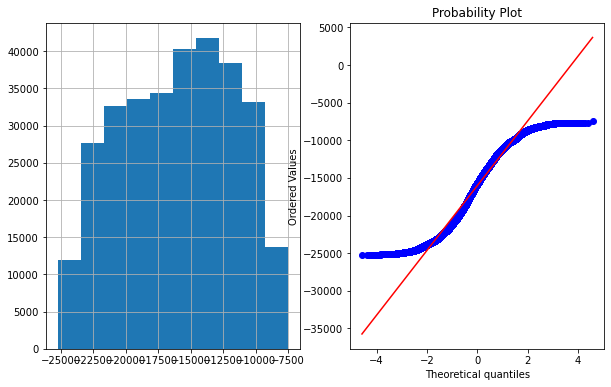

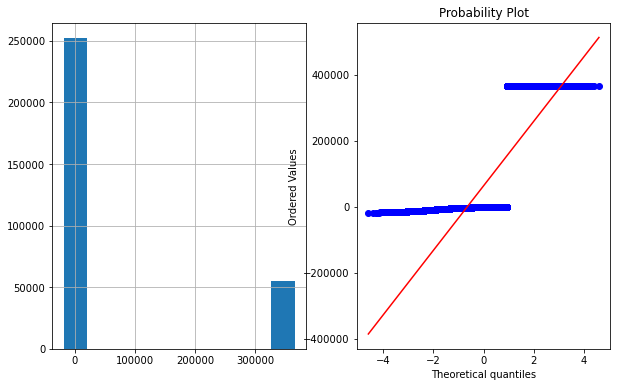

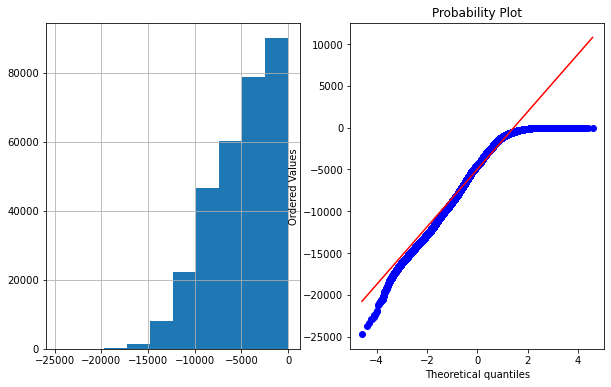

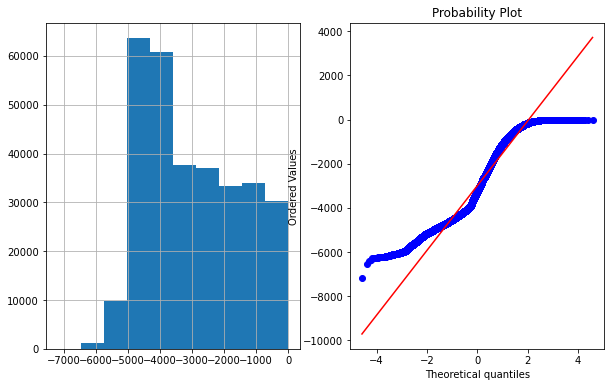

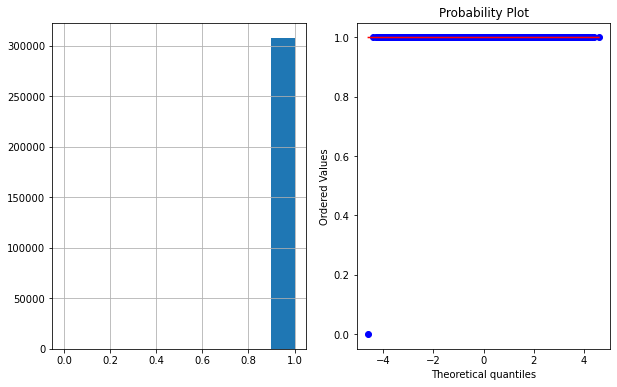

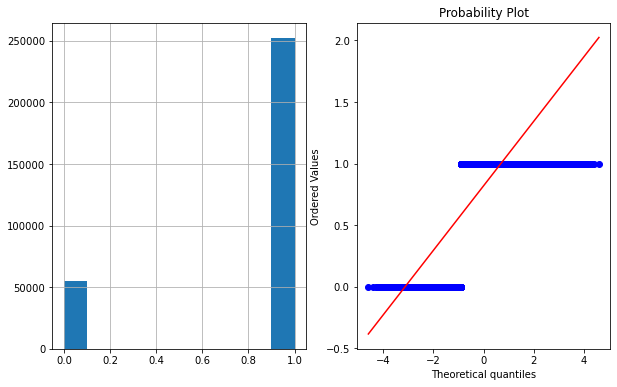

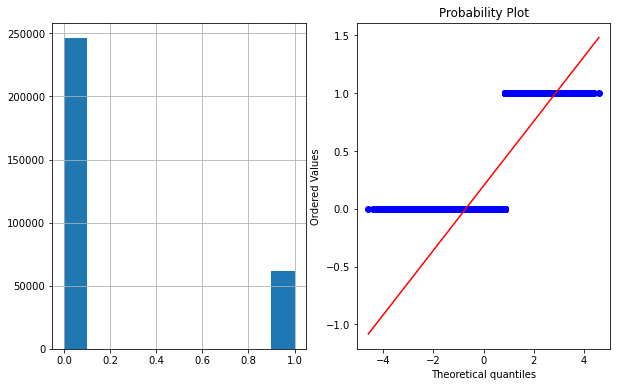

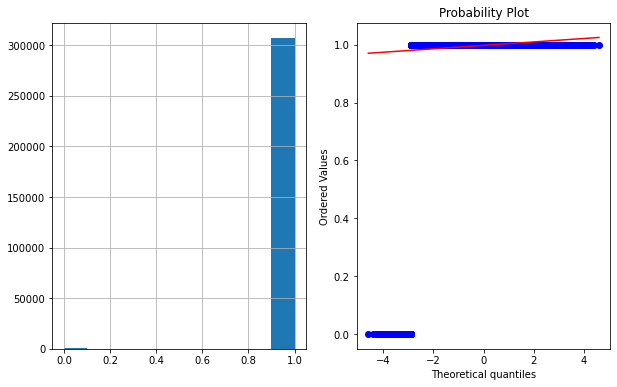

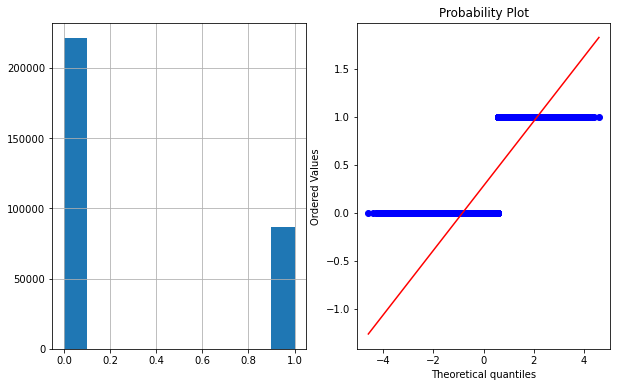

In [ ]:
x=[ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
plot_data(x)

In [15]:
def boxplot(x):
    for i in x:
        plt.figure(figsize=(5,5))
        sns.boxplot(df[i])

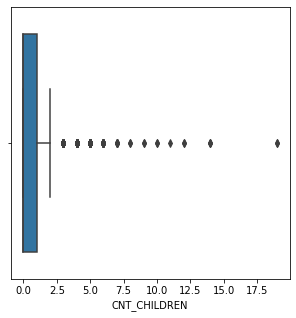

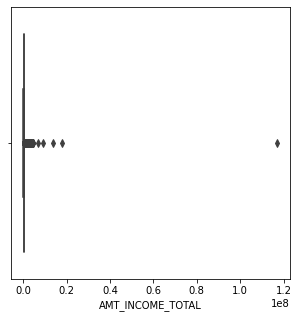

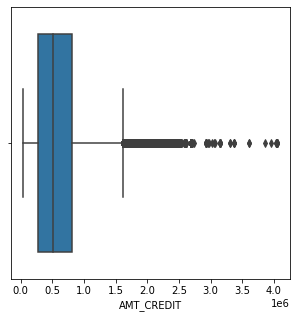

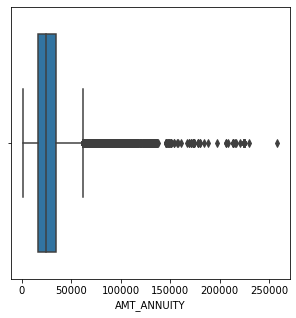

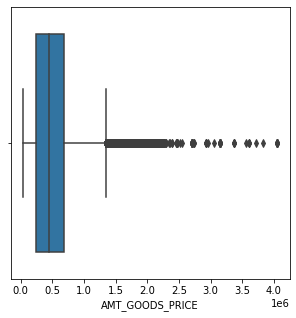

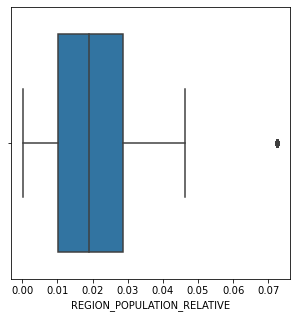

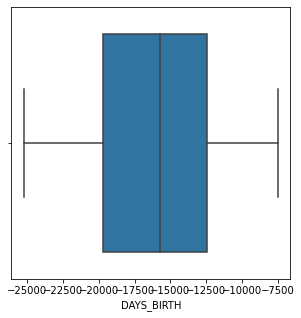

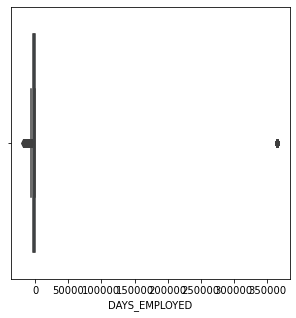

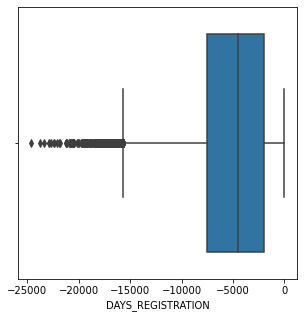

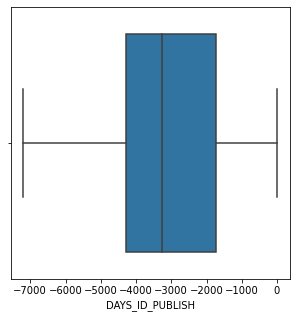

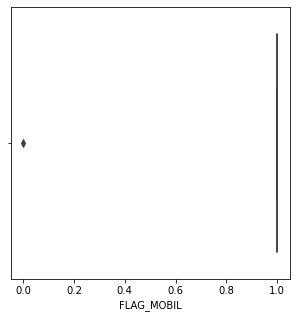

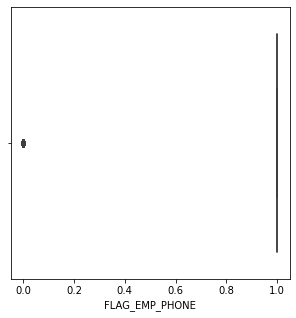

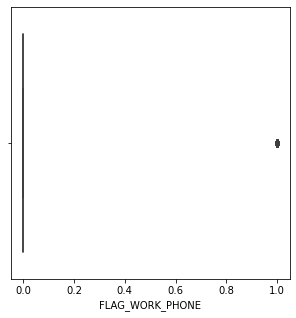

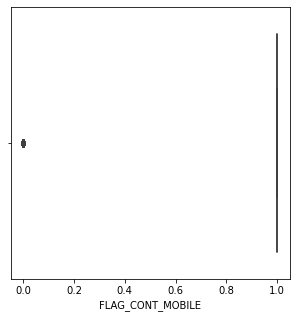

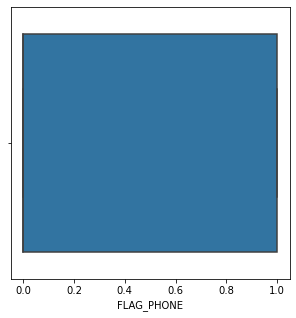

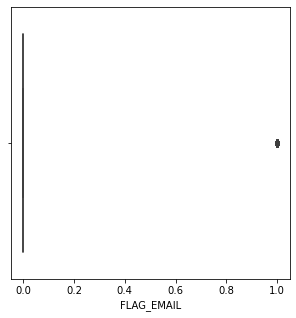

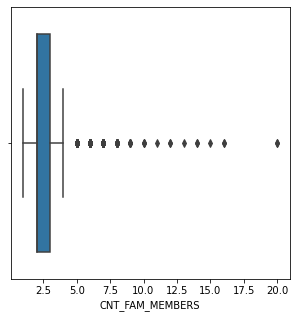

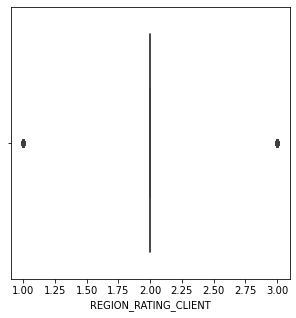

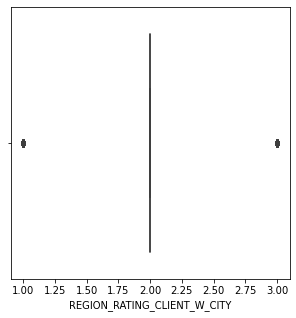

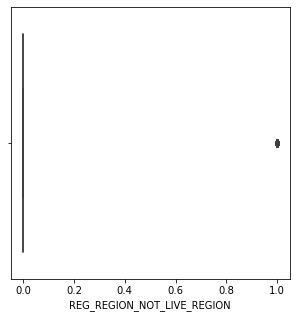

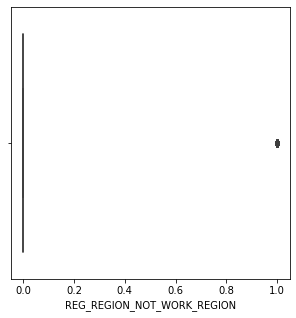

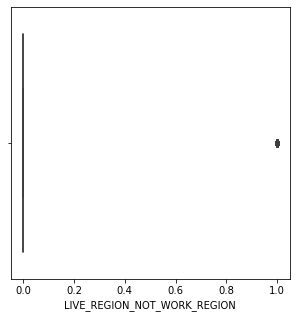

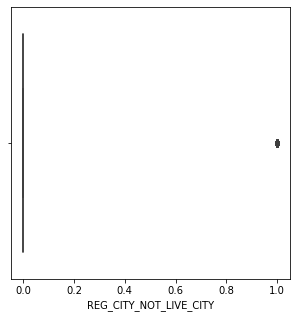

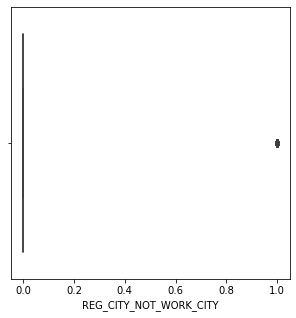

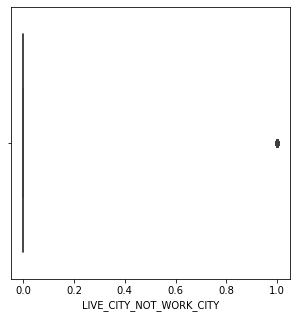

In [17]:
x=[ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
boxplot(x)

In [22]:
df["REGION_RATING_CLIENT_W_CITY"].value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

# Seperate the numerical and categorical columns

In [22]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [57]:
categorical_data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [83]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["TARGET"]),df["TARGET"],test_size=0.30,random_state=30)

In [84]:
from sklearn.impute import KNNImputer,SimpleImputer

In [85]:
sim=SimpleImputer(strategy='most_frequent')

In [88]:
df_sim=sim.fit_transform(df)

In [89]:
X_train.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [62]:
pd.DataFrame(df_sim,columns=X_train.columns).isnull().sum()

SK_ID_CURR                     0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
dtype: int64

In [9]:
X_train["ORGANIZATION_TYPE"].value_counts().nlargest(10)

Business Entity Type 3    47547
XNA                       38793
Self-employed             26987
Other                     11657
Medicine                   7771
Government                 7370
Business Entity Type 2     7351
School                     6248
Trade: type 7              5455
Kindergarten               4791
Name: ORGANIZATION_TYPE, dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder()

In [33]:
X_OHE=pd.DataFrame(data=OHE.fit_transform(df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]).toarray())
X_OHE

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
307507,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307508,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307509,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
df.drop(columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE',"NAME_TYPE_SUITE"],inplace=True)

In [36]:
pd.concat((df,df_cat,X_OHE),axis=1)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS,0,1,2,3,4,5,6,7,8
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
